# Kannada MNIST Handwritten Digits

Centers around the [Kannada MNIST Competition](https://www.kaggle.com/c/Kannada-MNIST/overview) in Kaggle.

## 0. Imports

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## 1. Loading and Exploring the data.

In [2]:
train_df = pd.read_csv('./datasets/Kannada_MNIST/Kannada-MNIST/train.csv')
test_df = pd.read_csv('./datasets/Kannada_MNIST/Kannada-MNIST/test.csv')

In [8]:
train_df.shape

(60000, 785)

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 359.3 MB


In [10]:
train_df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0,60000.000000,60000.0
mean,4.500000,0.0,0.0,0.0,0.0,0.0,0.008817,0.029467,0.037767,0.075933,...,0.015583,0.016450,0.013417,0.022300,0.012217,0.001383,0.003783,0.0,0.002717,0.0
std,2.872305,0.0,0.0,0.0,0.0,0.0,1.474271,2.700491,2.726371,3.993023,...,1.443852,1.958914,1.342572,2.051846,1.730959,0.338846,0.926724,0.0,0.665445,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
50%,4.500000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,157.000000,255.000000,255.000000,83.000000,227.000000,0.0,163.000000,0.0


*Notes*: It seems 785 columns - 1 for the label and the remaining 784 marked as 0 to 783 pixes, which would result in a 28x28 image size. Considering the information provided on the competition's Kaggle page the images are going to have only 1 channel. Looking at the df description it seems that it is already rescaled from 0 to 255.

In [63]:
def display_img(img_row, img_height=28, img_width=28):
    '''
        A helper function to display an image from 
        one of the rows.
        Default height and width are 28.
    '''
    img_np = img_row.reshape((img_height, img_width))
    img = plt.imshow(img_np, cmap='gray')

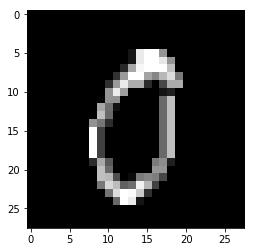

In [65]:
# displaying the first image
display_img(train_df.iloc[0,1:].values)

## 2. The Train-Test Split

Train-Test split has been chosen (arbitrarily) to be 20%.

In [68]:
X, y = train_df.iloc[:, 1:], train_df.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)